In [51]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

* churned (0 = Stayed, 1 = Left)

# Loading Data

In [52]:
df = pd.read_csv('data.csv')

# remove leading and trailing spaces in the col names of the data
df.columns = df.columns.str.strip()

# remove leading and trailing spaces in the cells of the data
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [53]:
df

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,user_1,Premium,US,134.9,4,Electronic,6,0,1,0
1,user_2,Premium,PK,165.7,5,Pop,8,0,12,0
2,user_3,Free,DE,45.9,3,Classical,3,0,3,0
3,user_4,Premium,PK,106.0,0,Jazz,7,0,3,0
4,user_5,Premium,US,89.6,5,Country,2,1,6,0
...,...,...,...,...,...,...,...,...,...,...
995,user_996,Free,IN,47.6,5,Hip-Hop,5,0,27,1
996,user_997,Premium,BR,115.1,5,Country,2,0,4,0
997,user_998,Premium,FR,89.5,6,Classical,0,0,1,0
998,user_999,Free,AU,33.2,3,Classical,5,0,15,1


In [54]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1000 non-null   object 
 1   subscription_type      1000 non-null   object 
 2   country                1000 non-null   object 
 3   avg_daily_minutes      1000 non-null   float64
 4   number_of_playlists    1000 non-null   int64  
 5   top_genre              1000 non-null   object 
 6   skips_per_day          1000 non-null   int64  
 7   support_tickets        1000 non-null   int64  
 8   days_since_last_login  1000 non-null   int64  
 9   churned                1000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 78.3+ KB
None


In [55]:
df.head()

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,user_1,Premium,US,134.9,4,Electronic,6,0,1,0
1,user_2,Premium,PK,165.7,5,Pop,8,0,12,0
2,user_3,Free,DE,45.9,3,Classical,3,0,3,0
3,user_4,Premium,PK,106.0,0,Jazz,7,0,3,0
4,user_5,Premium,US,89.6,5,Country,2,1,6,0


## Unique values

In [56]:
df.nunique()

user_id                  1000
subscription_type           2
country                    10
avg_daily_minutes         733
number_of_playlists        11
top_genre                   7
skips_per_day              15
support_tickets             3
days_since_last_login      51
churned                     2
dtype: int64

## Summary Statistics

In [57]:
df.describe()


,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,97.442100,3.434000,4.631000,0.232000,9.496000,0.186000
std,42.916587,2.324015,2.777148,0.514238,9.742017,0.389301
min,-37.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.900000,1.000000,3.000000,0.000000,2.000000,0.000000
50%,97.900000,3.000000,5.000000,0.000000,7.000000,0.000000
75%,129.750000,5.000000,6.000000,0.000000,14.000000,0.000000
max,237.800000,10.000000,14.000000,2.000000,58.000000,1.000000


# Data Cleaning

In [58]:
# Data Cleaning: Check negative values
negative_minutes = df[df['avg_daily_minutes'] < 0]
print(f"Rows with negative avg_daily_minutes: {len(negative_minutes)}")

# Fix negative values (assuming data entry error, clip to 0)
df['avg_daily_minutes'] = df['avg_daily_minutes'].clip(lower=0)


Rows with negative avg_daily_minutes: 7


## Missing values

In [59]:
df.isnull().sum()

user_id                  0
subscription_type        0
country                  0
avg_daily_minutes        0
number_of_playlists      0
top_genre                0
skips_per_day            0
support_tickets          0
days_since_last_login    0
churned                  0
dtype: int64

# Feature Engg

## Skips Ratio
* 10 skips in 1 hour is normal. 10 skips in 5 minutes is anger

In [60]:
df['skips_ratio'] = df['skips_per_day'] / (df['avg_daily_minutes'] + 1)

## Engagement Score
* Users who listen a lot AND build playlists are "locked in"

In [61]:
df['engagement_score'] = df['avg_daily_minutes'] * (df['number_of_playlists'] + 1)

## Inactivity Flag
* If they haven't logged in for > 2 weeks (14 days), risk explodes.

In [62]:
df['is_inactive'] = (df['days_since_last_login'] > 14).astype(int)

# EDA

## Class Imbalance

In [63]:
df['churned'].value_counts()

churned
0    814
1    186
Name: count, dtype: int64

## Numerical Cols

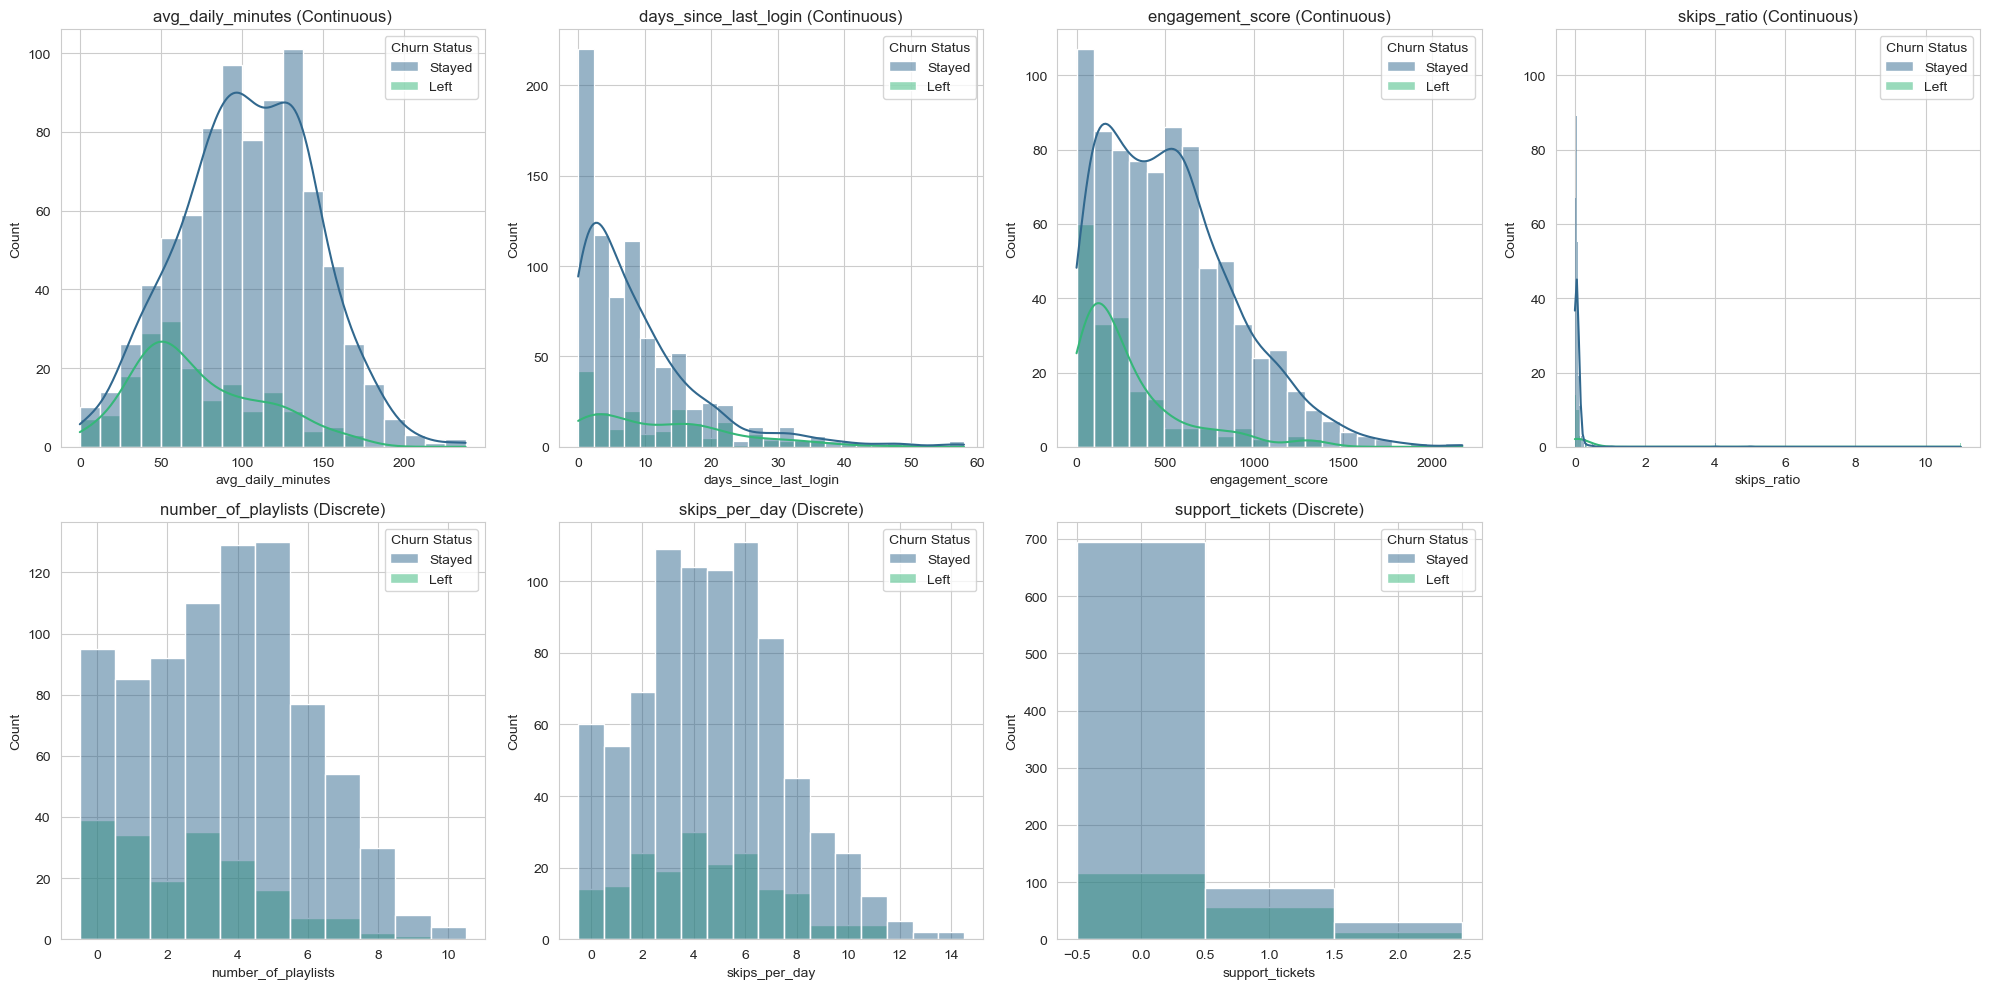

In [64]:
import warnings

warnings.filterwarnings("ignore")
np.seterr(all='ignore')

# Create a readable label column
df['Churn Status'] = df['churned'].map({0: 'Stayed', 1: 'Left'})

# Set up the visual style
sns.set_style("whitegrid")

# Create a figure for distributions of numerical features
numerical_cols = ['avg_daily_minutes', 'number_of_playlists', 'skips_per_day', 'days_since_last_login', 'support_tickets', 'engagement_score', 'skips_ratio']

# Define which numerical_cols are continuous (smooth) vs discrete (integers)
continuous_cols = ['avg_daily_minutes', 'days_since_last_login', 'engagement_score', 'skips_ratio']
discrete_cols = ['number_of_playlists', 'skips_per_day', 'support_tickets']

plt.figure(figsize=(20, 10))

# Plot Continuous (Keep KDE)
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=col, hue='Churn Status', kde=True, palette='viridis')
    plt.title(f'{col} (Continuous)')

# Plot Discrete (Turn OFF KDE to prevent warnings)
for i, col in enumerate(discrete_cols):
    plt.subplot(2, 4, len(continuous_cols) + i + 1)
    sns.histplot(data=df, x=col, hue='Churn Status', kde=False, discrete=True, palette='viridis')
    plt.title(f'{col} (Discrete)')

plt.tight_layout()
plt.show()

## Categorical Cols

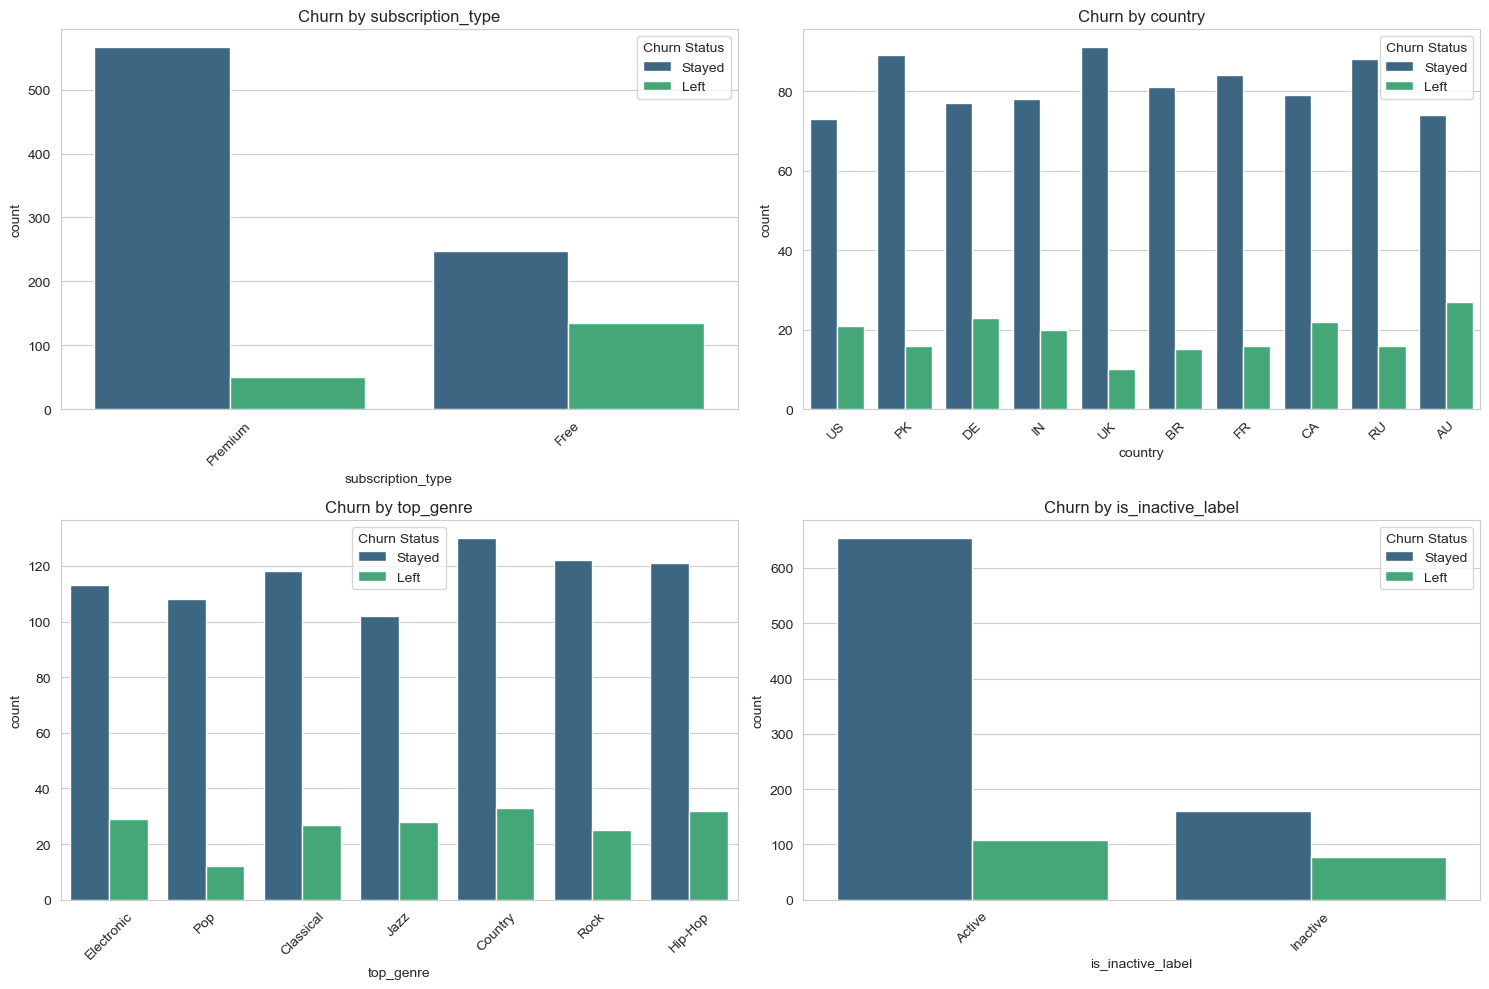

In [65]:
# Create a figure for categorical features vs churn

df['is_inactive_label'] = df['is_inactive'].map({0: 'Active', 1: 'Inactive'})
categorical_cols = ['subscription_type', 'country', 'top_genre', 'is_inactive_label']
nominal_cols = ['country', 'top_genre']
binary_cols = ['subscription_type', 'is_inactive_label']

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='Churn Status', palette='viridis')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Country Analysis

--- Customer Base by Country (Count) ---
country
PK    105
RU    104
UK    101
CA    101
AU    101
DE    100
FR    100
IN     98
BR     96
US     94
Name: count, dtype: int64

--- Customer Base by Country (Percentage) ---
country
PK    10.5
RU    10.4
UK    10.1
CA    10.1
AU    10.1
DE    10.0
FR    10.0
IN     9.8
BR     9.6
US     9.4
Name: proportion, dtype: float64

--- Churn Rate by Country (Risk) ---
country
AU    26.732673
DE    23.000000
US    22.340426
CA    21.782178
IN    20.408163
FR    16.000000
BR    15.625000
RU    15.384615
PK    15.238095
UK     9.900990
Name: churned, dtype: float64


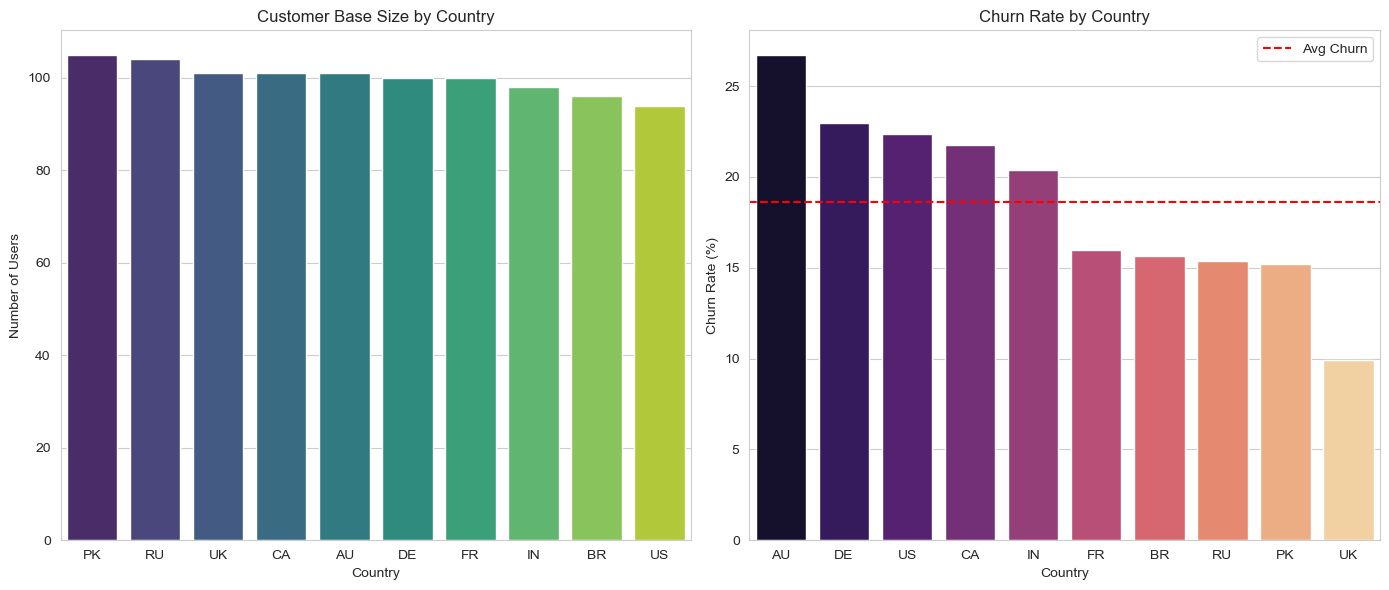

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

# . Silence warnings
warnings.filterwarnings("ignore")
np.seterr(all='ignore')


#Analysis: Customer Base by Country
country_counts = df['country'].value_counts()
country_pct = df['country'].value_counts(normalize=True) * 100

# Analysis: Churn Rate by Country
churn_rate_country = df.groupby('country')['churned'].mean().sort_values(ascending=False) * 100

print("--- Customer Base by Country (Count) ---")
print(country_counts)
print("\n--- Customer Base by Country (Percentage) ---")
print(country_pct)
print("\n--- Churn Rate by Country (Risk) ---")
print(churn_rate_country)

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Volume (Who are our users?)
plt.subplot(1, 2, 1)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Customer Base Size by Country')
plt.ylabel('Number of Users')
plt.xlabel('Country')

# Risk (Who is leaving?)
plt.subplot(1, 2, 2)
sns.barplot(x=churn_rate_country.index, y=churn_rate_country.values, palette='magma')
plt.title('Churn Rate by Country')
plt.ylabel('Churn Rate (%)')
plt.axhline(df['churned'].mean()*100, color='r', linestyle='--', label='Avg Churn')
plt.legend()
plt.xlabel('Country')

plt.tight_layout()
plt.show()

## Correlation Matrix of Numeric Cols

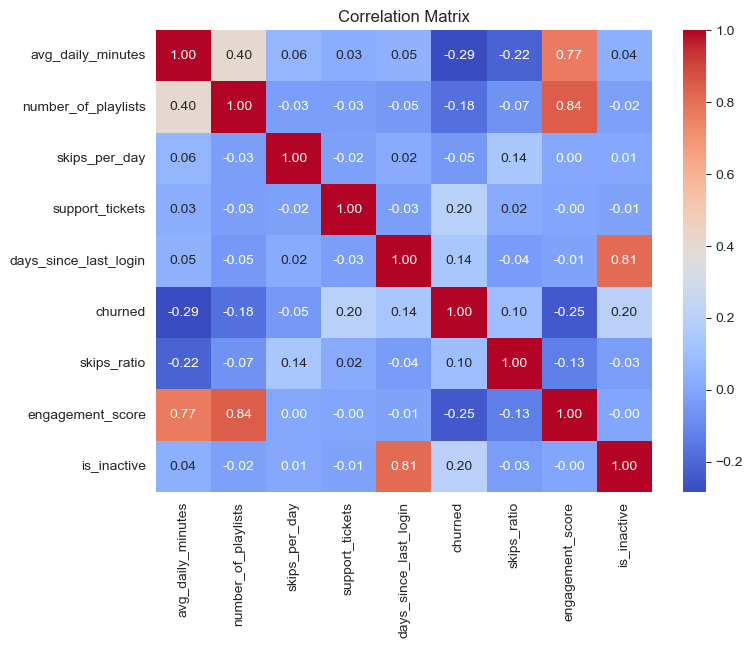

In [67]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Prexprocessing

## Creating the Input and Target Data

In [68]:
X = df.drop(columns=['churned', 'user_id', 'is_inactive_label', 'Churn Status'])
y = df["churned"]

In [69]:
X

,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,skips_ratio,engagement_score,is_inactive
0,Premium,US,134.9,4,Electronic,6,0,1,0.044150,674.5,0
1,Premium,PK,165.7,5,Pop,8,0,12,0.047990,994.2,0
2,Free,DE,45.9,3,Classical,3,0,3,0.063966,183.6,0
3,Premium,PK,106.0,0,Jazz,7,0,3,0.065421,106.0,0
4,Premium,US,89.6,5,Country,2,1,6,0.022075,537.6,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Free,IN,47.6,5,Hip-Hop,5,0,27,0.102881,285.6,1
996,Premium,BR,115.1,5,Country,2,0,4,0.017227,690.6,0
997,Premium,FR,89.5,6,Classical,0,0,1,0.000000,626.5,0
998,Free,AU,33.2,3,Classical,5,0,15,0.146199,132.8,1


In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    0
998    1
999    0
Name: churned, Length: 1000, dtype: int64

## One Hot Encode & Standarization

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
pipeline_categorical_cols = ['subscription_type', 'country', 'top_genre']
pipeline_bin_cols = ["is_inactive"]
pipeline_numerical_cols = numerical_cols = ['avg_daily_minutes', 'number_of_playlists', 'skips_per_day', 'support_tickets', 'days_since_last_login', 'skips_ratio', 'engagement_score']
print(pipeline_categorical_cols)
print(pipeline_bin_cols)
print(pipeline_numerical_cols)

['subscription_type', 'country', 'top_genre']
['is_inactive']
['avg_daily_minutes', 'number_of_playlists', 'skips_per_day', 'support_tickets', 'days_since_last_login', 'skips_ratio', 'engagement_score']


* One Hot Encoding for pipeline_categorical_cols
* Normalization for pipeline_numerical_cols

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        # BUCKET 1: Text -> OneHotEncoder
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), pipeline_categorical_cols),
        
        # BUCKET 2: Numbers -> StandardScaler
        ('num', StandardScaler(), pipeline_numerical_cols),

        # Pipe 3: Do nothing to the binary flags
        ('bin', 'passthrough', pipeline_bin_cols)
    ],
    verbose_feature_names_out=False
)

## Applying the Preprocessor/Transformation

In [74]:
X_matrix = preprocessor.fit_transform(X)
X_processed = pd.DataFrame(
    X_matrix, 
    columns=preprocessor.get_feature_names_out(),
    index=X.index
)

In [75]:
X_processed

,subscription_type_Premium,country_BR,country_CA,country_DE,country_FR,country_IN,country_PK,country_RU,country_UK,country_US,...,top_genre_Pop,top_genre_Rock,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,skips_ratio,engagement_score,is_inactive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.876971,0.243666,0.493198,-0.451379,-0.872535,-0.099292,0.553612,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.600545,0.674171,1.213722,-0.451379,0.257160,-0.091011,1.429471,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.213875,-0.186839,-0.587587,-0.451379,-0.667136,-0.056566,-0.791271,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.198034,-1.478355,0.853460,-0.451379,-0.667136,-0.053430,-1.003866,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.187246,0.674171,-0.947849,1.494220,-0.359037,-0.146889,0.178557,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.173937,0.674171,0.132937,-0.451379,1.797652,0.027340,-0.511829,1.0
996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.411817,0.674171,-0.947849,-0.451379,-0.564437,-0.157343,0.597720,0.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.189595,1.104676,-1.668372,-0.451379,-0.872535,-0.194486,0.422110,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.512232,-0.186839,0.132937,-0.451379,0.565258,0.120740,-0.930444,1.0


## Spliting the data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 11) (200, 11) (800,) (200,)


# Model Building

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

## Pipeline

In [78]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [79]:
model_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different trans

# Model Evaluation

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [81]:
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       163
           1       0.32      0.62      0.42        37

    accuracy                           0.68       200
   macro avg       0.60      0.66      0.60       200
weighted avg       0.78      0.68      0.71       200



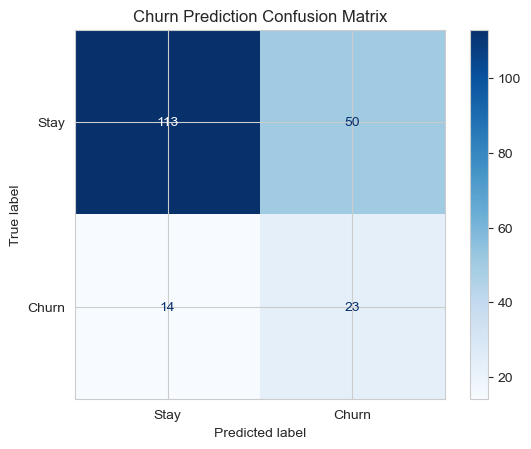

In [82]:
# Generate the matrix (using y_test and y_pred from your pipeline)
cm = confusion_matrix(y_test, y_pred)

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Churn"])
disp.plot(cmap='Blues', values_format='d') 
plt.title("Churn Prediction Confusion Matrix")
plt.show()

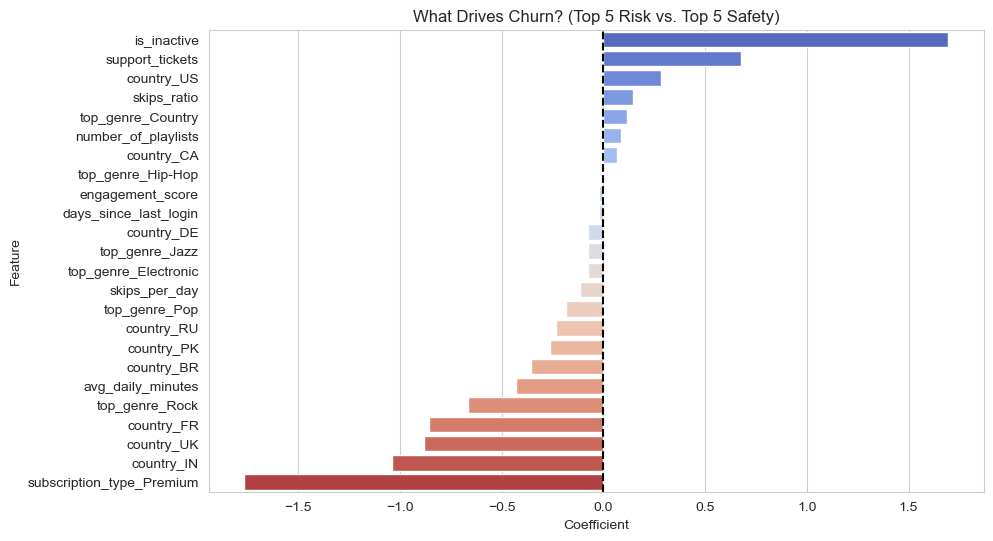

Top Risk Factor (Highest Positive): is_inactive
Top Safety Factor (Lowest Negativec): subscription_type_Premium


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

model = model_pipeline.named_steps['classifier']
preprocessor = model_pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False) # Sort high to low

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([coef_df, coef_df]), 
            y='Feature', x='Coefficient', palette='coolwarm')
plt.title('What Drives Churn? (Top 5 Risk vs. Top 5 Safety)')
plt.axvline(0, color='black', linestyle='--')
plt.show()

print("Top Risk Factor (Highest Positive):", coef_df.iloc[0]['Feature'])
print("Top Safety Factor (Lowest Negativec):", coef_df.iloc[-1]['Feature'])

In [84]:
df["top_genre"].value_counts()

top_genre
Country       163
Hip-Hop       153
Rock          147
Classical     145
Electronic    142
Jazz          130
Pop           120
Name: count, dtype: int64

In [85]:

# 1. Find the exact Weight (Coefficient) the model gave India
# We look for the column that contains "country_IN"
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefs = model_pipeline.named_steps['classifier'].coef_[0]

# Zip them together to find the specific number
feat_map = dict(zip(feature_names, coefs))
in_weight = feat_map.get('cat__country_IN', 0)

print(f"--- The Verdict on India ---")
print(f"Model Weight for IN: {in_weight:.4f}")
if in_weight > 0:
    print("Interpretation: Being from India INCREASED risk (Red Bar).")
else:
    print("Interpretation: Being from India REDUCED risk (Blue Bar).")

# 2. The "Why" (Compare Behavior)
# Let's see if Indian users are different from the Average user
cols_to_check = ['avg_daily_minutes', 'number_of_playlists', 'skips_per_day']
print("\n--- Behavior Comparison ---")
print("Global Average:")
print(df[cols_to_check].mean())
print("\nIndia Average:")
print(df[df['country'] == 'IN'][cols_to_check].mean())

--- The Verdict on India ---
Model Weight for IN: 0.0000
Interpretation: Being from India REDUCED risk (Blue Bar).

--- Behavior Comparison ---
Global Average:
avg_daily_minutes      97.5704
number_of_playlists     3.4340
skips_per_day           4.6310
dtype: float64

India Average:
avg_daily_minutes      95.668367
number_of_playlists     3.418367
skips_per_day           5.193878
dtype: float64


In [88]:
import os
import joblib

# 1. Create the 'data' folder if it doesn't exist
os.makedirs('model', exist_ok=True)

# 2. Now save the model
joblib.dump(model, 'model/model.joblib')

print("✅ Success! Folder created and model saved.")

✅ Success! Folder created and model saved.


In [89]:
import joblib

# Save the preprocessor again to the new folder
joblib.dump(preprocessor, 'model/preprocessor.joblib')

print("✅ Verified: 'preprocessor.joblib' and 'model.joblib' are both in the data folder.")

✅ Verified: 'preprocessor.joblib' and 'model.joblib' are both in the data folder.
